# Lista 1 - MS211
## João Pedro de Moraes Bonucci

## Ex 1:
### Considere um sistema de ponto flutuante com base 10, 4 dígitos para mantissa e 2 para o expoente.

### (a) Qual o maior número (estritamente) positivo representável?

A representação de fonto flutuante consiste na utilização de uma mantissa com os n termos mais significativos do número e um expoente para definir o grau de grandeza além do sinal do número.

Sabendo disso, como o podemos representar apenas 4 dígitos na matissa e o maior expoente é 2, o maior número representado nesse sistema é 0,9999 * 10^2 = 99,99.

### (b) E qual é o menor?

O menor número representado por esse sistema é 0,1000 * 10^(-2) = 0,001000

### (c) Qual o épsilon dessa máquina?

O épsilon da máquina é o maior número que somado a 1 ainda é interpretado como 1. No sistema proposto o menor número representado é 0,001 , logo, se somarmos qualquer número entre 0 e 0,0005 o sistema interpretará como uma adição nula. Por isso  épsilon da máquina é 0,0005.

### (d) Dado x ∈ R dentro da faixa dada pelos ítens (a) e (b). Seja x̄ sua respresentação no sistema de ponto flutuante. Quais os máximos erro absoluto e erro relativo que podem ocorrer ao se tentar representar x por x̄?

Considerando os números entre 0 e 99,99 e sabendo que a fórmula do erro absoluto é dada por $|x-\bar{x}|$ e a formula do erro relativo é dado por $\frac{|x-\bar{x}|}{x}$ temos que o maior erro absoluto é:

$$|99,984999999999... - 99,99| = 0,005$$

e o maior erro relativo é:

$$\frac{|0,0010004999... - 0,001000|}{0,0010004999...} = 0,0005$$

In [173]:
using Plots
using LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [174]:
# erro reltivo
function expr(x_simples, x)
    return abs.(x - x_simples)/x
end

# erro absoluto
function expr1(x_simples, x)
    return abs.(x - x_simples)
end

x_6 = LinRange{Float64}(0.001, 0.01, 200)
x_simples_6 = round.(x_6, digits = 6)

x_5 = LinRange{Float64}(0.01, 0.1, 100)
x_simples_5 = round.(x_5, digits = 5)

x_4 = LinRange{Float64}(0.1, 1, 100)
x_simples_4 = round.(x_4, digits = 4)

x_3 = LinRange{Float64}(1, 10, 100)
x_simples_3 = round.(x_3, digits = 3)

x_2 = LinRange{Float64}(10, 100, 200)
x_simples_2 = round.(x_2, digits = 2)

x_simples = vcat(x_simples_6,x_simples_5,x_simples_4,x_simples_3,x_simples_2)
x = vcat(x_6,x_5,x_4,x_3,x_2)

maior = 0
x1 = 0
x2 = 0

for i in 1:700
	valor = expr(x_simples[i],x[i])
	if valor > maior
		maior = valor
		x1 = x_simples[i]
		x2 = x[i]
	end
end

println(maior)
println(x1)
println(x2)

0.00041474654377892376
0.00109
0.0010904522613065328


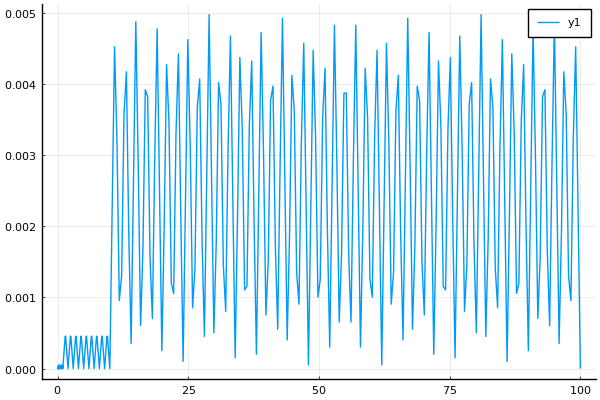

In [175]:
# erro absoluto
plot(x_simples, expr1.(x_simples, x))

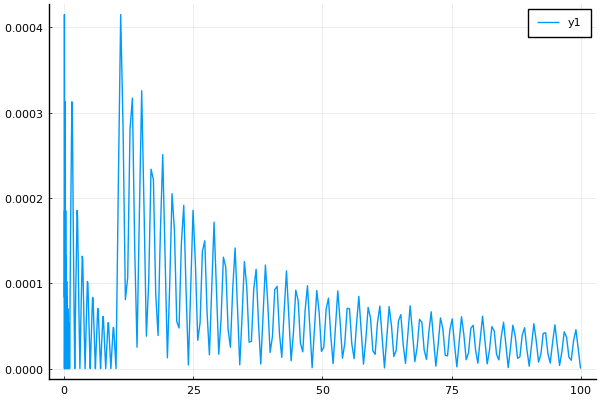

In [176]:
# erro relativo
plot(x_simples, expr.(x_simples, x))

## Ex 2:
### Para cada uma das expressões abaixo diga em que situação pode ocorrer erro de cancelamento e reescreva a expressão para evitar esse problema nessa situação:

### (a) $\sqrt{1 + x} − 1$

Essa função apresenta erro de cancelamento quando x -> 0 por se tratar de uma subrtação de números muito próximos.

Esse erro pode ser evitado com a seguinte refatoração

$$\sqrt{1+x}-1 => (\sqrt{1+x}-1)(\sqrt{1+x}+1) = 1+x-1 = x => \sqrt{1+x}-1 = \frac{x}{\sqrt{1+x}+1}$$

In [177]:
# Erro relativo
function erro_rel(x, xh)
    return abs(x - xh) / abs(xh)
end

erro_rel (generic function with 1 method)

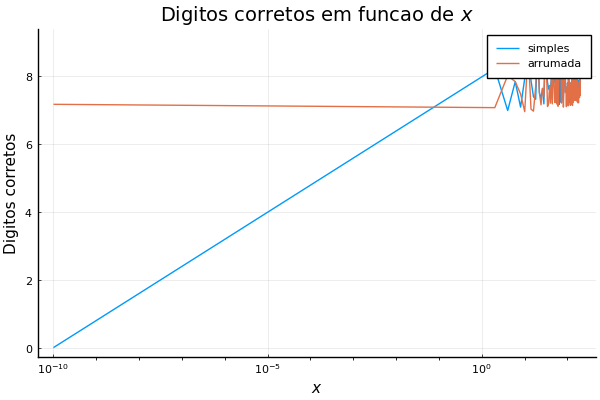

In [178]:
function original(x)
    return sqrt(1+x)-1 
end

function arrumada(x)
	return x/(sqrt(1+x)+1) 
end

x = LinRange(10^(-10), 200, 100)
dupla = original.(x)
x_simples = map(Float32, x)
simples = original.(x_simples)
arrumado = arrumada.(x_simples)

erro1 = log10.(erro_rel.(simples, dupla))
erro2 = log10.(erro_rel.(arrumado, dupla))
plot(x, [-erro1,-erro2], xaxis=:log10, 
     title=L"Digitos corretos em funcao de $x$", 
     ylabel="Digitos corretos", xlabel=L"$x$", label = ["simples" "arrumada"])


### (b) log x − log y

Essa função apresenta erro de cancelamento quando x -> y pois se trata da subtração de dois números muito próximos.


Esse erro pode ser evitado com a seguinte refatoração

$$log(x) - log(y) = log(\frac{x}{y})$$

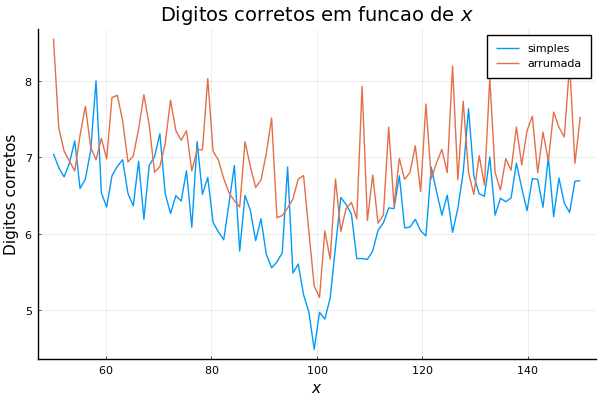

In [179]:
function original(x)
    return log(x)-log(100)
end

function arrumada(x)
	return log(x/100) 
end

x = LinRange(50, 150, 100)
dupla = original.(x)
x_simples = map(Float32, x)
simples = original.(x_simples)
arrumado = arrumada.(x_simples)

erro1 = log10.(erro_rel.(simples, dupla))
erro2 = log10.(erro_rel.(arrumado, dupla))
plot(x, [-erro1,-erro2],  
     title=L"Digitos corretos em funcao de $x$", 
     ylabel="Digitos corretos", xlabel=L"$x$", label = ["simples" "arrumada"])

### (c) (1 − cos x)/ sin x

Essa função apresenta erro de cancelamento quando x -> 0 ou x -> $2\cdot \pi \cdot k$ por se tratar de uma subrtação de números muito próximos.

Esse erro pode ser evitado com a seguinte refatoração

$$\frac{(1-cos(x))}{(sin(x))} = \sqrt{\frac{(1-cos(x))^2}{(sin(x))^2}} = \sqrt{\frac{(1-cos(x))^2}{1-cos^2(x)}} = \sqrt{\frac{1-cos(x)}{1+cos(x)}} = \sqrt{\frac{\frac{1-cos(x)}{2}}{\frac{1+cos(x)}{2}}} = \frac{sin(x/2)}{cos(x/2)} = tan(x/2)$$

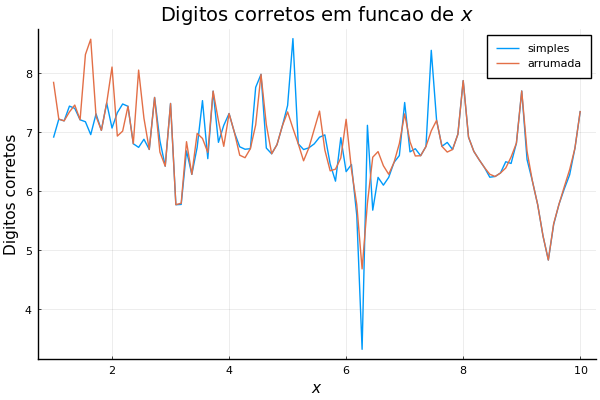

In [180]:
function original(x)
    return (1-cos(x))/(sin(x))
end

function arrumada(x)
	return tan(x/2)
end

x = LinRange(1, 10, 100)
dupla = original.(x)
x_simples = map(Float32, x)
simples = original.(x_simples)
arrumado = arrumada.(x_simples)

erro1 = log10.(erro_rel.(simples, dupla))
erro2 = log10.(erro_rel.(arrumado, dupla))
plot(x, [-erro1,-erro2],
     title=L"Digitos corretos em funcao de $x$", 
     ylabel="Digitos corretos", xlabel=L"$x$", label = ["simples" "arrumada"])

## Ex 3
### Dadas $f(x) = x(\sqrt{x+1} - \sqrt{x})$ e $g(x) = \frac{x}{\sqrt{x+1}+\sqrt{x}}$

### calcule f (500) e g(500) em um sistema de ponto flutuante com 6 dígitos significativos (na mantissa) e compare a qualidade dos resultados. Obs: você pode usar uma calculadora para ajudar nas contas, é claro, mas lembre de representar o resultado de cada operação com 6 dígitos antes de continuar para o próximo passo.

Função f em ponto flutuante:

$f(500) = 500(\sqrt{500+1}-\sqrt{500}) = 500(22,3830 - 22,3606) = 500 (0,0224) = 11,2$

Função g em ponto flutuante:

$g(500) = \frac{500}{\sqrt{500+1}+\sqrt{500}} = \frac{500}{22,3830+22,3606} = \frac{500}{44,7436} = 11.1748$

Resultado esperado: 11.174755300747198473819744625...

Podemos perceber que a função g(x) consegue 3 casas decimais a mais de precisão do que a função f(x) quando computadas em ponto flutuante.

## Ex 4
### Apresente a fórmula geral do polinômio de Taylor de grau n de cada uma das expressões abaixo em torno do x 0 :

Formula da série de Taylor:
$$ \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$

### (a) $f(x) = \frac{1}{(1-x)}$, $x_0 = 0$

Calculando os 5 primeiros termos:

n = 0 -> 1, n = 1 -> x, n = 2 -> x^2, n = 3 -> x^3, n = 4 -> x^4

com isso percebemos que:
$$\frac{1}{1-x} = \sum_{n=0}^{\infty} x^n$$

### (b) $f(x) = sin(x)$, $x_0 = 0$

Calculando os 4 primeiros termos:

n = 0 -> $x = \frac{x^{1+2*0}}{(1+2*0)!}$

n = 1 -> $-\frac{x^3}{6} = -\frac{x^{1+2*1}}{(1+2*1)!}$

n = 2 -> $\frac{x^5}{120} = \frac{x^{1+2*2}}{(1+2*2)!}$

n = 3 -> $-\frac{x^7}{5040} = -\frac{x^{1+2*3}}{(1+2*3)!}$

Com isso percebemos que:

$$sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n \cdot x^{1+2n}}{(1+2n)!}$$

### (c) $f(x) = \sqrt{x}$, $x_0 = 1$

Calculando os 5 primeiros termos:

n = 0 -> $1 = \frac{(x-1)^0}{0!}$

n = 1 -> $(x-1) = \frac{(x-1)^1}{1!}$

n = 2 -> $\frac{(x-1)^2}{2} = \frac{(x-1)^2}{2!}$

n = 3 -> $\frac{(x-1)^3}{6} = \frac{(x-1)^3}{3!}$

n = 4 -> $\frac{(x-1)^4}{24} = \frac{(x-1)^4}{4!}$

Com isso percebemos que:

$$\sqrt{x} = \sum_{n=0}^{\infty} \frac{(x-1)^n}{n!}$$

### (d) $f(x) = e^x$, $x_0 = 1$

Calculando os 6 primeiros termos:

n = 0 -> $e = \frac{e(x-1)^0}{0!}$

n = 1 -> $e (x - 1) = \frac{e(x-1)^1}{1!}$

n = 2 -> $1/2 e (x - 1)^2 = \frac{e(x-1)^2}{2!}$

n = 3 -> $1/6 e (x - 1)^3 = \frac{e(x-1)^3}{3!}$

n = 4 -> $1/24 e (x - 1)^4 = \frac{e(x-1)^4}{4!}$

n = 5 -> $1/120 e (x - 1)^5 = \frac{e(x-1)^5}{5!}$

Com isso percebemos que:

$$e^{x} = \sum_{n=0}^{\infty} \frac{e(x-1)^n}{n!}$$

## Ex 5
### Mostre que matematicamente $f''(x) ≈ \frac{f (x + h) − 2f (x) + f (x − h)}{h^2}$ em que h é número pequeno em relação a x. O erro (matemático) que é feito nessa aproximação é proporcional a h ou a h^2 ?

Para a primeira derivada podemos partir da fórmula:
$$f'(x) = lim_{x->0} \frac{f(x)-f(x-h)}{h} = lim_{x->0} \frac{f(x+h)-f(h)}{h}$$

aplicando o polinômio de taylor em $f(x-h)$ e $f(x+h)$ bteos as seguintes expressões:
$$f(x+h) = f(x) + h \cdot f'(x) + \frac{h^2 \cdot f''(x)}{2} + \frac{h^3 \cdot f'''(z)}{6} + + \frac{h^4 \cdot f^{(4)}(z)}{24}$$

$$f(x-h) = f(x) - h \cdot f'(x) + \frac{h^2 \cdot f''(x)}{2} - \frac{h^3 \cdot f'''(z)}{6} + + \frac{h^4 \cdot f^{(4)}(z)}{24}$$

Agora somando esses dois polinômios conseguimos obter:

$$f(x+h) + f(x-h) =$$
$$ f(x) + h \cdot f'(x) + \frac{h^2 \cdot f''(x)}{2} + \frac{h^3 \cdot f'''(z)}{6} + \frac{h^4 \cdot f^{(4)}(z)}{24}+ $$
$$ f(x) - h \cdot f'(x) + \frac{h^2 \cdot f''(x)}{2} - \frac{h^3 \cdot f'''(z)}{6} + \frac{h^4 \cdot f^{(4)}(z)}{24}$$

$$f(x+h) + f(x-h) = 2(x) + h^2 \cdot f''(x) + \frac{h^4 \cdot f^{(4)}(z)}{12}$$

isolado $f''(x)$ temos:

$$f''(x) = \frac{f(x+h) - 2(x) + f(x-h)}{h^2} - \frac{h^2 \cdot f^{(4)}(z)}{12}$$

com isso percebemos que o erro feito ($\frac{h^2 \cdot f^{(4)}(z)}{12}$) é proporcionla a $h^2$

## Ex 6
### Seguindo os passos da análise feita em sala de aula, determine qual é o valor ótimo do h a ser usado para calular a derivada de f (x) = ln(x) por diferenças centradas para pontos no intervalor [24, 26]. Lembre que a fórmula depende dos valores possíveis do máximos de f'' e f' que são facilmente calculáveis nesse caso.Verifique se o valor que você calculou é de fato bom fazendo o gráfico do erro relativo com respeito a derivada exata para h = 10 −1 , 10 −2 , . . . , 10 −14 em x = 25.

$$f(x + h) = f(x) + f'(x)h + \frac{f''(z)}{2}h^2$$
$ z = (x,x+h) \in [24,26]$ onde $26 = x+H$ e $24 = x-H$

para encontrar a melhor estimativa de h podemos usar a expressão:
$$|h| = 2\sqrt{\frac{L_f}{L_{f''}}}\sqrt{E_{mac}}$$

sendo que $L_{f''}$ é o módulo máximo de $f''$ em [x-H,x+H]

e $L_f$ é o limite superior para os valores de f no intervalo de interesse

como a função estudada ($ln(x)$) apresenta valores sempre crescentes no eixo positivo, seu limite superior no intervalo é dado por $ln(26) = 3,258$

e como a derivada segunda de $ln(x)$ é $-\frac{1}{x^2}$ temos que seu módulo máximo para o intervalo é $|-\frac{1}{24^2}| = 0,0017$

Sendo $E_{mac}$ dado pela célula de código abaixo, temos que o h ideal é:

$$|h| = 2\sqrt{\frac{3,258}{0,0017}}\sqrt{2,220446049250313 \cdot 10^(-16)} = 1.2910507797... × 10^-6$$

In [181]:
eps(1.0)

2.220446049250313e-16

In [182]:
ponto = 25 # ponto estudado

# aproximação da derivada
function dif(f, x, h = 1.29105078 * 10^(-6))
	return (f(x + h) - f(x)) / h
end

# Função para teste e sua derivada.
f(x) = log(x)
df(x) = 1/x

function erro_rel(aprox, exato)
	return abs(aprox - exato) / abs(exato)
end

# Teste da aproximação
println("Valor exato da derivada: ", df(ponto))
println("Valor da aproximação: ", dif(f, ponto))
println("Erro relativo na aproximação: ", erro_rel(dif(f, ponto), df(ponto)))

Valor exato da derivada: 0.04
Valor da aproximação: 0.039999999231392025
Erro relativo na aproximação: 1.9215199396904747e-8


A ordem de grandeza do erro é de 8 negativo, ou seja, temos uma precisão de 8 casas. Comparando com o gráfico abaixo podemos ver que está é uma boa precisão, mas temos valores de h melhores

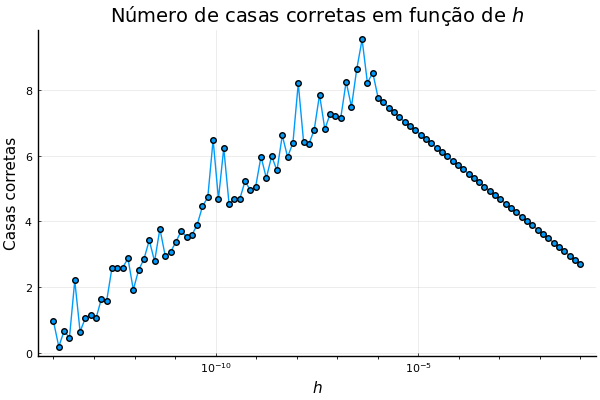

In [183]:
expoentes = LinRange(-1, -14, 100)
h = 10.0.^expoentes
aproxs = dif.(f, ponto, h)
plot(h, -log10.(erro_rel.(aproxs, df(ponto))),
xaxis=:log10, label="", marker=:c,
xlabel=L"h", ylabel="Casas corretas")
title!(L"Número de casas corretas em função de $h$")

Para tentar melhorar o resultado, utilizarei a furmula da diferença centrada:
$$f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}.$$

onde o erro é limitado por $\frac{L_{f'''}}{6} h^2$. Ou seja, é proporcional a $h^2$ ao invés de $h$ e podemos estimar o h ideal pela fórmula: $$h = (3\epsilon_{mac})^{1/3} = 6,055454452... * 10^{-6}$$

com isso, como mostrado abaixo, consegui uma precisão de 10 casas.

In [184]:
eps(1.0)^(1/3)

6.055454452393343e-6

In [185]:
function dif_centrada(f, x, h=eps(1.0)^(1/3))
    return (f(x + h) - f(x - h)) / (2*h)
end

# Teste da aproximação
println("Valor exato da derivada:     ", df(ponto))
println("Valor da aproximação:        ", dif_centrada(f, ponto))
println("Erro relativo na aproximação: ", erro_rel(dif_centrada(f, ponto), df(ponto)))


Valor exato da derivada:     0.04
Valor da aproximação:        0.040000000014142806
Erro relativo na aproximação: 3.5357012456715964e-10


Apenas de do excelente resultado, ao aumentar o número do pontos no gráfico acima percebi que aparentemente á um valor de h ainda melhor, gerando 12 casas de precisão, mas apenas consegui encontralo por força bruta.

(9.533346620000854, 42)


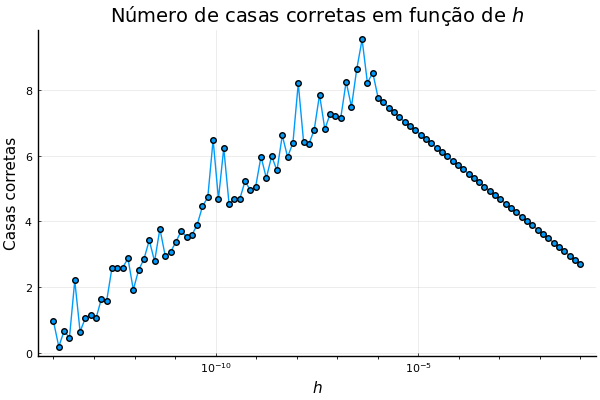

In [186]:
expoentes = LinRange(-1, -14, 100000)

casas = -log10.(erro_rel.(aproxs, df(ponto)))
melhor = findmax(casas)

println(melhor)
plot(h, casas,
xaxis=:log10, label="", marker=:c,
xlabel=L"h", ylabel="Casas corretas")
title!(L"Número de casas corretas em função de $h$")

In [187]:
top_exp = expoentes[melhor[2]]

# Teste da aproximação
println("Melhor expoente:     ", top_exp)
println("Valor exato da derivada:     ", df(ponto))
println("Valor da aproximação:        ", dif_centrada(f, ponto, 10.0^top_exp))
println("Erro relativo na aproximação: ", erro_rel(dif_centrada(f, ponto, 10.0^top_exp), df(ponto)))

Melhor expoente:     -1.005330053300533
Valor exato da derivada:     0.04
Valor da aproximação:        0.04000020816259013
Erro relativo na aproximação: 5.204064753260018e-6
